<a href="https://colab.research.google.com/github/av-dutta/Loan-approval-Prediction/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Data collection and preprocessing

In [ ]:
df = pd.read_csv('Loandata.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Total,Percent
Credit_History,50,8.14
Self_Employed,32,5.21
LoanAmount,22,3.58
Dependents,15,2.44
Loan_Amount_Term,14,2.28
Gender,13,2.12
Married,3,0.49
Loan_Status,0,0.00
Property_Area,0,0.00
CoapplicantIncome,0,0.00


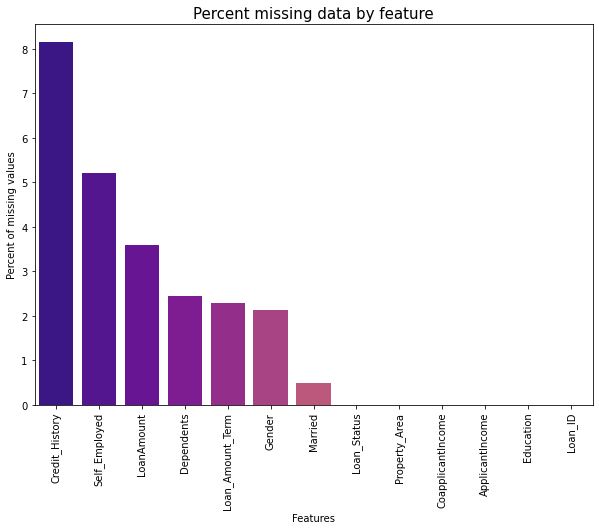

In [ ]:
# missing value inspection
Value_Missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2).sort_values(ascending=False)
missing_data = pd.concat([Value_Missing, percent_missing], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize = (10, 7))
plt.xticks(rotation = '90')
sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette='plasma')
plt.xlabel('Features', fontsize = 10)
plt.ylabel('Percent of missing values', fontsize = 10)
plt.title('Percent missing data by feature', fontsize = 15)
missing_data.head(10)

In [ ]:
# statistical measures
df.describe([0.8, 0.9, 0.99])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
80%,6252.400000,2535.000000,182.000000,360.00000,1.000000
90%,9459.900000,3782.200000,235.800000,360.00000,1.000000
99%,32540.410000,8895.890000,496.360000,480.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### The dependent variable is 'Loan_Status'. If the value is 'Y' then the loan is approved and if it is 'N' then loan is not approved for the applicant.

In [ ]:
print(df['Loan_Status'].value_counts(normalize = True), print(df['Loan_Status'].value_counts()))

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64 None


In [ ]:
y = df['Loan_Status'].value_counts()
colors = ['#FEBFB3', '#E1396C']

trace = go.Pie(labels=y.index,values=y,textinfo='value',
            marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
layout = go.Layout(title = 'Arroved vs not Approved',width=500,height=500)
fig = go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

In [ ]:
# object type variables
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print('\nThe values are:')
        print() 
        print(df[i].value_counts())
        print()

Loan_ID

The values are:

LP001050    1
LP002794    1
LP002626    1
LP002201    1
LP002705    1
           ..
LP002892    1
LP002940    1
LP001469    1
LP001052    1
LP002361    1
Name: Loan_ID, Length: 614, dtype: int64

Gender

The values are:

Male      489
Female    112
Name: Gender, dtype: int64

Married

The values are:

Yes    398
No     213
Name: Married, dtype: int64

Dependents

The values are:

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education

The values are:

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed

The values are:

No     500
Yes     82
Name: Self_Employed, dtype: int64

Property_Area

The values are:

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status

The values are:

Y    422
N    192
Name: Loan_Status, dtype: int64



In [ ]:
df.drop('Loan_ID', axis = 1, inplace = True)

In [ ]:
# generate count statistics of duplicate entries
if (len(df[df.duplicated()]) > 0):
    print('No. of duplicated entries: ', len(df[df.duplicated()]))
    print(df[df.duplicated(keep = False)].sort_values(by = list(df.columns)).head())
else:
    print('No duplicated entries found')

No duplicated entries found


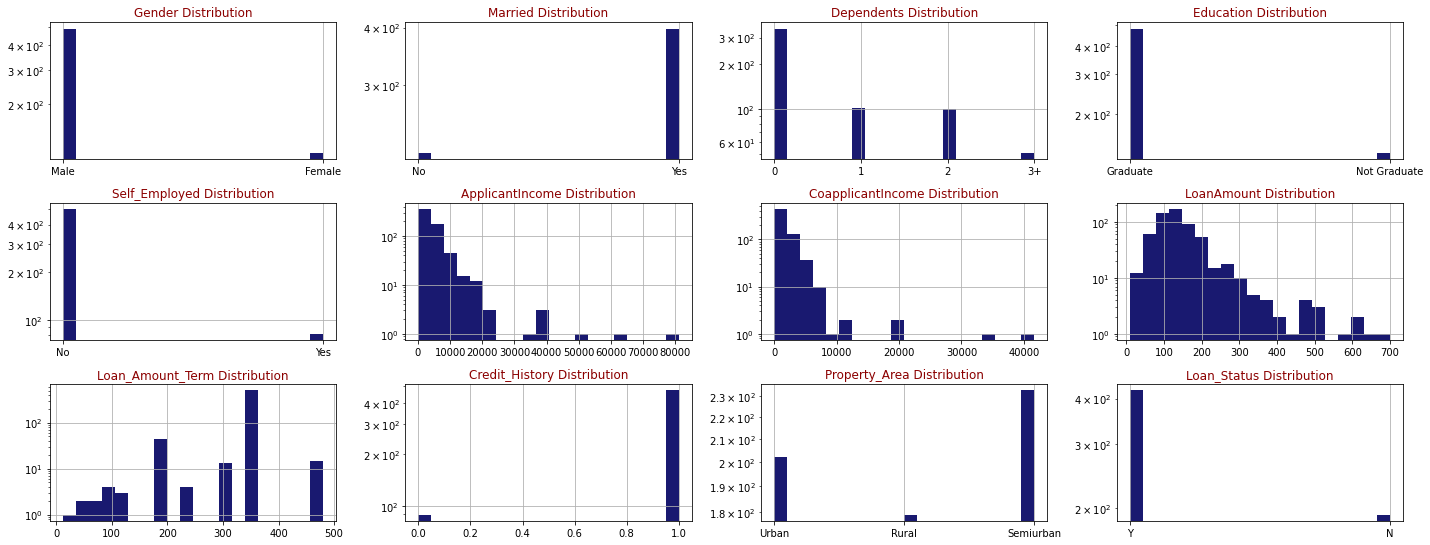

In [ ]:
# Plot histogram of each parameter
def draw_histograms(dataframe, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins = 20, ax = ax, facecolor = 'midnightblue')
        ax.set_title(feature+' Distribution', color = 'DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df,df.columns,8, 4)

In [ ]:
import plotly.express as px

df1 = df.select_dtypes([np.object])

for i, col in enumerate(df1.columns):
  fig = px.histogram(df1, 
                     x = col, 
                     color = 'Loan_Status',
                     width=750,   # plot width
                     height=500,  # plot height 
                     template='simple_white')
  fig.show()

In [ ]:
df.shape

(614, 12)

In [ ]:
X = df.iloc[:,:11]
Y = df['Loan_Status']

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [ ]:
# applying iterative imputer to impute the missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr, missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
X = imp.fit_transform(X)

[IterativeImputer] Completing matrix with shape (614, 20)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.06
[IterativeImputer] Change: 119.11585722661201, scaled tolerance: 81.0 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.09
[IterativeImputer] Change: 0.3488117409532947, scaled tolerance: 81.0 
[IterativeImputer] Early stopping criterion reached.


In [ ]:
Y = pd.DataFrame(Y)
Y.replace({'Loan_Status':{'N': 0, 'Y': 1}}, inplace = True)

In [ ]:
Y = np.array(Y)

### Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify= Y)

In [ ]:
print(x_train.shape, x_test.shape)

(491, 20) (123, 20)


### Applying standardscaler on x_train and x_test separately.

In [ ]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()

In [ ]:
x_train_norm = norm.fit_transform(x_train)
x_test_norm = norm.fit_transform(x_test)

### Support Vector Machine Model

In [ ]:
classifier = svm.SVC(kernel = 'linear')

In [ ]:
classifier.fit(x_train_norm, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = classifier.predict(x_test_norm)

# Model Evaluation

In [ ]:
print('Accuracy score of the svm model is: ',round((accuracy_score(y_test, y_pred) * 100), 2), '%')

Accuracy score of the svm model is:  81.3 %


[[16 22]
 [ 1 84]]


[Text(0, 0.5, 'Loan Denied'), Text(0, 1.5, 'Loan Approved')]

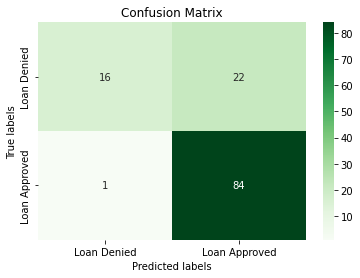

In [ ]:
labels = ['Loan Denied', 'Loan Approved']
cm = confusion_matrix(y_test, y_pred)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap = 'Greens'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123



### Trying different kernel for SVM

In [ ]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']

In [ ]:
for i in kernel:
  model = svm.SVC(kernel = i)
  model = model.fit(x_train_norm, y_train)
  print('Kernel : ', i)
  print('Acc Score: ', accuracy_score(y_test, model.predict(x_test_norm)))

Kernel :  linear
Acc Score:  0.8130081300813008
Kernel :  rbf
Acc Score:  0.8211382113821138
Kernel :  poly
Acc Score:  0.8048780487804879
Kernel :  sigmoid
Acc Score:  0.8292682926829268


### K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_norm, y_train)
  y_pred_er = knn.predict(x_test_norm)
  error_rate.append(np.mean(y_pred_er != y_test))

Text(0, 0.5, 'Error_rate')

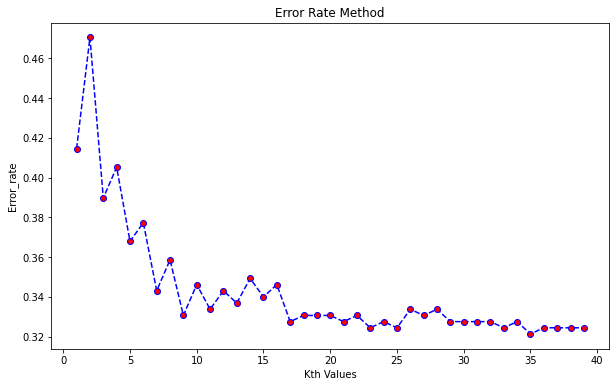

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red')
plt.title('Error Rate Method')
plt.xlabel('Kth Values')
plt.ylabel('Error_rate')

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 23, p = 3, metric = 'euclidean')

In [ ]:
KNN =  KNN.fit(x_train_norm, y_train)
y_pred_KNN = KNN.predict(x_test_norm)

In [ ]:
print('Accuracy score of the knn model is: ',round((accuracy_score(y_test, y_pred_KNN) * 100), 2), '%')

Accuracy score of the knn model is:  73.17 %


In [ ]:
# Number of datapoints
n_neighbors = range(1,50,2)

# Weights
weights = ['uniform', 'distance']

# Algorithm selection
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Metric
metric = ['minkowski','euclidean']

# Hyperparameter Grid
param_dict = {'n_neighbors' : n_neighbors,
              'weights' : weights,
              'algorithm' : algorithm,
              'metric' : metric}

In [ ]:
# Create an instance of the RandomForestClassifier
knn = KNeighborsClassifier()

# Grid search
knn_grid = GridSearchCV(estimator = knn,
                       param_grid = param_dict,
                       cv = 5, 
                       verbose = 2, 
                       scoring = 'roc_auc')

knn_grid.fit(x_train_norm, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=distance; total time

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': range(1, 50, 2),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=2)

In [ ]:
print(knn_grid.best_estimator_, knn_grid.best_params_)

KNeighborsClassifier(n_neighbors=37, weights='distance') {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 37, 'weights': 'distance'}


In [ ]:
knn_optimal_model = KNeighborsClassifier(n_neighbors = 37, weights = 'distance', algorithm = 'auto', 
                                         metric = 'minkowski')

knn_optimal_model =  knn_optimal_model.fit(x_train_norm, y_train)
y_pred_optimalknn = knn_optimal_model.predict(x_test_norm)                                                           

In [ ]:
print('Accuracy score of the knn model is: ',round((accuracy_score(y_test, y_pred_optimalknn) * 100), 2), '%')

Accuracy score of the knn model is:  75.61 %


### SVM provides the better accuracy score than KNN.

### DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, max_leaf_nodes=5, random_state=0)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5, random_state=0)

In [ ]:
y_predicted = dt_classifier.predict(x_test)

[[16 22]
 [ 1 84]]


[Text(0, 0.5, 'Loan Denied'), Text(0, 1.5, 'Loan Approved')]

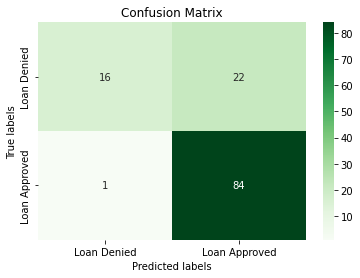

In [ ]:
labels = ['Loan Denied', 'Loan Approved']
cm = confusion_matrix(y_test, y_predicted)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap = 'Greens'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
cr = classification_report(y_test, y_predicted)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'max_depth':(10,20,30,40,50,60,70,100), 'criterion': ('gini','entropy'),
'max_features': ('log2', 'auto', 'sqrt'),'min_samples_split':(2,4,6)}

In [ ]:
DT_hp = RandomizedSearchCV(DecisionTreeClassifier(),param_distributions = parameters, cv = 5, verbose=2)

In [ ]:
DT_hp.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=40, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=40, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=40, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=40, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=40, max_features=log2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=30, max

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (10, 20, 30, 40, 50, 60,
                                                      70, 100),
                                        'max_features': ('log2', 'auto',
                                                         'sqrt'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=2)

In [ ]:
dt_optimalmodel = DT_hp.best_estimator_
print(dt_optimalmodel)

DecisionTreeClassifier(criterion='entropy', max_depth=70, max_features='sqrt',
                       min_samples_split=4)


In [ ]:
model_dt = dt_optimalmodel.fit(x_train, y_train)
y_pred_optimaldt = dt_optimalmodel.predict(x_test)

[[23 15]
 [25 60]]


[Text(0, 0.5, 'Loan Denied'), Text(0, 1.5, 'Loan Approved')]

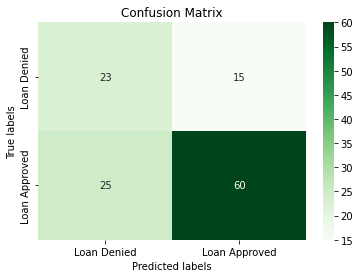

In [ ]:
labels = ['Loan Denied', 'Loan Approved']
cm = confusion_matrix(y_test, y_pred_optimaldt)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap = 'Greens'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
cr = classification_report(y_test, y_pred_optimaldt)
print(cr)

              precision    recall  f1-score   support

           0       0.48      0.61      0.53        38
           1       0.80      0.71      0.75        85

    accuracy                           0.67       123
   macro avg       0.64      0.66      0.64       123
weighted avg       0.70      0.67      0.68       123



### After investigating three models SVM, KNN and DecisionTreeClassifier the SVM model came out to be best among them with accuracy of 82% with the kernels of rbf and sigmoid.